# 🔍 N-gram 기반 양손잡이 리더십 키워드 분석 템플릿

In [1]:
!pip install kiwipiepy pandas scikit-learn

In [8]:
from kiwipiepy import Kiwi
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 폰트 캐시 초기화 (최신 방식)
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

In [2]:
df = pd.read_csv('data/skhynix/leadership_news.csv')
texts = df['content'].dropna().tolist()

In [3]:
kiwi = Kiwi()
def tokenize_for_ngram(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9\s]", " ", text)
    tokens = [token.form for token in kiwi.tokenize(text) 
              if token.tag.startswith("NN") or token.tag == "SL"]
    return " ".join(tokens)
tokenized_texts = [tokenize_for_ngram(t) for t in texts]

In [4]:
vectorizer = CountVectorizer(ngram_range=(2, 4), min_df=2)
X = vectorizer.fit_transform(tokenized_texts)
ngrams = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)
ngram_freq = pd.DataFrame({
    'ngram': ngrams,
    'count': counts
}).sort_values(by='count', ascending=False)
ngram_freq.head(30)

,ngram,count
98323,인공 지능,1044
67319,사회 가치,876
51168,메모리 반도체,805
45579,데이터 센터,684
53531,문제 해결,680
35199,기술 개발,624
56233,반도체 산업,564
11156,sk하이닉스 구성원,533
17744,가치 창출,439
109654,제품 개발,414


In [10]:
exploration_keywords = [
    "신사업", "플랫폼 전략", "디지털 전환", "AI 반도체", "차세대 공정", "3D DRAM", "HBM",
    "미래 기술", "오픈이노베이션", "R&D 투자 확대", "기술독립", "기술 자립화", "첨단소재 개발",
    "유연한 조직", "벤처 협업", "융합 기술", "자율성 부여", "위험 감수", "장기 전략",
    "파일럿 프로젝트", "혁신 생태계", "아이디어 제안", "기술 실험", "고객 중심 혁신",
    "차세대 패키징", "설계자산 확보", "경쟁력 있는 기술 선도", "초격차 전략", "선도 기술 확보",
    "창의적 조직 문화"
]
exploitation_keywords = [
    "공정 최적화", "양산 체계", "수율 향상", "공정 자동화", "생산성 향상", "설비 효율화",
    "원가 절감", "재고 관리", "운영 안정성", "ROI 극대화", "공급망 관리", "품질 인증",
    "생산 리드타임 단축", "에너지 효율 개선", "리스크 관리 체계", "수익성 강화", "정해진 목표 달성",
    "표준 공정 정립", "성과 관리 시스템", "ESG 대응 체계화", "클린룸 관리", "ERP 기반 통제",
    "운영 KPI 관리", "작업표준 확립", "공정 불량률 관리", "프로세스 개선", "업무 매뉴얼화",
    "규정 준수 강화", "직무 책임 강화", "조직 내 수직 협업"
]
from difflib import SequenceMatcher
def similar(a, b): return SequenceMatcher(None, a, b).ratio()
def match_keywords(ngrams, keywords):
    matches = []
    for kw in keywords:
        similar_phrases = [(ng, cnt) for ng, cnt in zip(ngrams, counts) if similar(ng, kw) > 0.8]
        matches += [(kw, ng, cnt) for ng, cnt in similar_phrases]
    return pd.DataFrame(matches, columns=["keyword", "matched_ngram", "count"]).sort_values(by='count', ascending=False)
matched_exploration = match_keywords(ngrams, exploration_keywords)
matched_exploitation = match_keywords(ngrams, exploitation_keywords)
matched_exploration.head(30), matched_exploitation.head(30)

(     keyword matched_ngram  count
 11     미래 기술         미래 기술    343
 12   첨단소재 개발         소재 개발     60
 22   아이디어 제안       아이디어 제안     52
 5     디지털 전환        디지털 전환     41
 13     융합 기술         융합 기술     20
 3     디지털 전환        디지털 변환     13
 17     장기 전략        중장기 전략     12
 16     장기 전략         장기 전략     10
 38   차세대 패키징       차세대 패키징      9
 39   차세대 패키징    차세대 패키징 기술      9
 21   아이디어 제안       아이디어 제시      8
 28   아이디어 제안       아이디어 제출      8
 9     차세대 공정        차세대 공정      7
 29   아이디어 제안       아이디어 제품      7
 7     차세대 공정         세대 공정      7
 24   아이디어 제안    아이디어 제안 리그      6
 20   아이디어 제안       아이디어 실제      5
 6     디지털 전환        디지털 환경      4
 0     플랫폼 전략        플랫폼 발전      4
 40   설계자산 확보         자산 확보      4
 19   아이디어 제안       아이디어 문제      4
 15     위험 감수         위험 감수      4
 41  선도 기술 확보     반도체 기술 확보      4
 10    차세대 공정        차세대 인공      3
 37   차세대 패키징       차세대 패키지      3
 27   아이디어 제안      아이디어 제안자      3
 30   아이디어 제안       아이디어 주제      3
 14    자율성 부여       

## 📊 6. 연도별 키워드 출현 빈도 분석

In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df['year'] = df['date'].dt.year

def yearly_ngram_analysis(df, keywords, label):
    yearly_stats = []
    for year, group in df.groupby('year'):
        tokenized = [tokenize_for_ngram(text) for text in group['content'].dropna()]
        text_series = [" ".join(t.split()) for t in tokenized]
        vec = CountVectorizer(ngram_range=(2, 4), vocabulary=keywords)
        X = vec.fit_transform(text_series)
        total = X.sum(axis=0).A1
        for k, v in zip(vec.get_feature_names_out(), total):
            yearly_stats.append({"year": year, "keyword": k, "count": v, "type": label})
    return pd.DataFrame(yearly_stats)

exploration_yearly_df = yearly_ngram_analysis(df, exploration_keywords, "탐색")
exploitation_yearly_df = yearly_ngram_analysis(df, exploitation_keywords, "활용")
yearly_result = pd.concat([exploration_yearly_df, exploitation_yearly_df])
yearly_result.head()

/home/arkwith/Dev/new_scraping/venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:1368: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


,year,keyword,count,type
0,2015,신사업,0,탐색
1,2015,플랫폼 전략,0,탐색
2,2015,디지털 전환,0,탐색
3,2015,AI 반도체,0,탐색
4,2015,차세대 공정,0,탐색


## 📈 7. 연도별 키워드 빈도 시각화 (옵션)

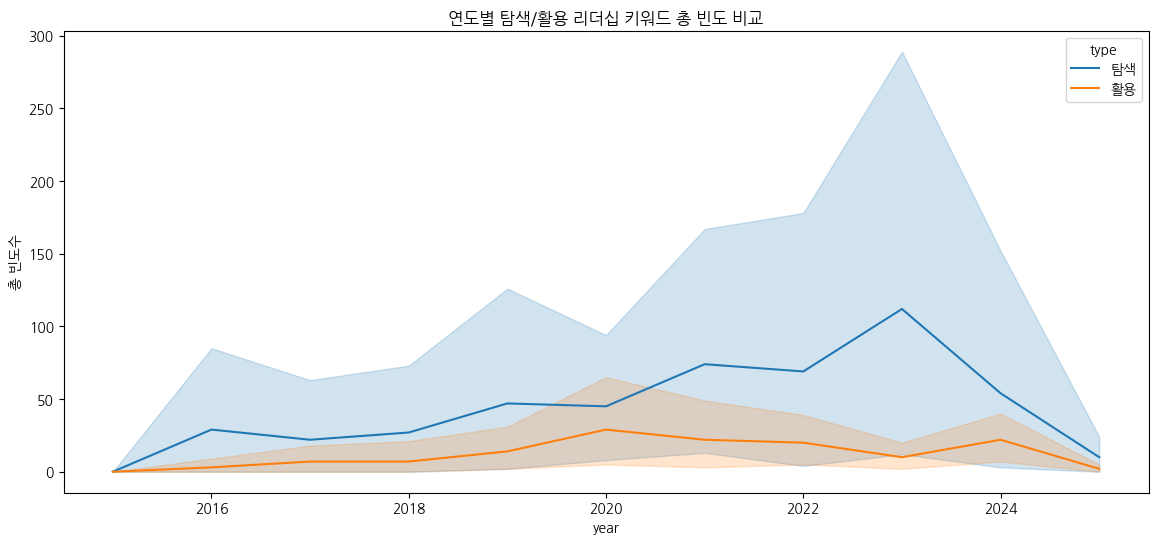

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_result, x="year", y="count", hue="type", estimator="sum")
plt.title("연도별 탐색/활용 리더십 키워드 총 빈도 비교")
plt.ylabel("총 빈도수")
plt.show()